In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [39]:
# Standardize the features
scaler = StandardScaler()
X = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = scaler.fit_transform(X)


In [40]:

# 1. Features used in this dataset for customer segmentation
features = customer_data.columns.tolist()
features


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

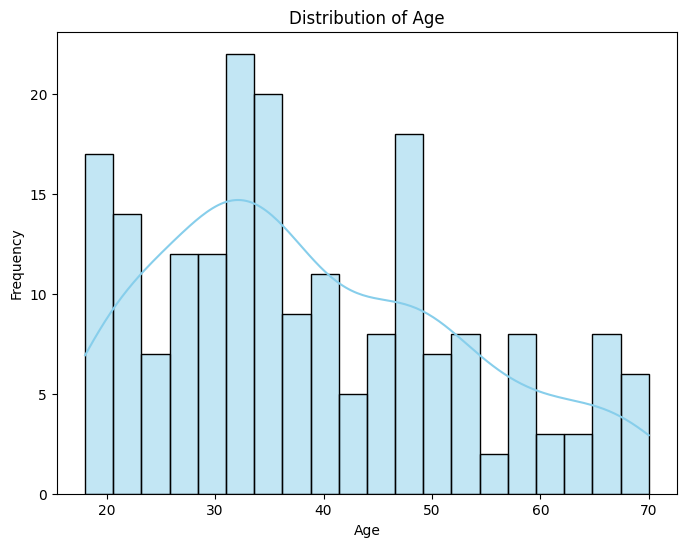

In [41]:
# 2. Distribution of the 'Age' feature
plt.figure(figsize=(8, 6))
sns.histplot(customer_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



In [42]:
# 3. Feature with the highest correlation with 'Spending Score (1-100)'
correlation_matrix = customer_data.corr()
correlation_matrix


<ipython-input-42-88061995e47b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = customer_data.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [43]:
highest_correlation = correlation_matrix['Spending Score (1-100)'].nlargest(2).index[1]
print("Feature with highest correlation with 'Spending Score (1-100)':", highest_correlation)


Feature with highest correlation with 'Spending Score (1-100)': CustomerID


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

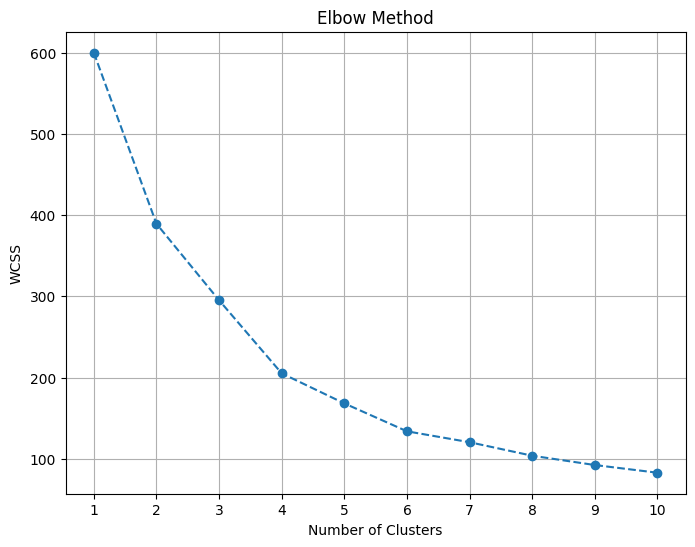

In [66]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, step=1))  # Set x-axis ticks to integer values
plt.grid(True)  # Add grid lines for better visualization
plt.show()


In [81]:
optimal_n_clusters =5


no of clusters can be 6



In [82]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:

# 5. Average annual income of customers
avg_annual_income = customer_data['Annual Income (k$)'].mean()
print("Average annual income of customers:", avg_annual_income)


Average annual income of customers: 60.56


In [84]:

# 6. Average spending score of male customers
avg_spending_score_male = customer_data[customer_data['Gender'] == 'Male']['Spending Score (1-100)'].mean()
print("Average spending score of male customers:", avg_spending_score_male)

Average spending score of male customers: 48.51136363636363


In [94]:
# 7. Cluster with the highest average income and spending score
cluster_avg = customer_data.groupby('Cluster').agg({'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
cluster_avg


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,54.382979,48.851064
1,86.100000,81.525000
2,41.092593,62.240741
3,26.750000,18.350000
4,86.102564,19.358974


In [87]:

# 8. Percentage of customers in Cluster 1
percentage_cluster_1 = (customer_data[customer_data['Cluster'] == 1].shape[0] / customer_data.shape[0]) * 100
print("Percentage of customers in Cluster 1:", percentage_cluster_1)



Percentage of customers in Cluster 1: 20.0


In [88]:
# 9. Most frequent age group in Cluster 2
most_frequent_age_group_cluster_2 = customer_data[customer_data['Cluster'] == 2]['Age'].mode()[0]
print("Most frequent age group in Cluster 2:", most_frequent_age_group_cluster_2)



Most frequent age group in Cluster 2: 19


In [89]:
# 10. Average income of customers in Cluster 3
average_income_cluster_3 = customer_data[customer_data['Cluster'] == 3]['Annual Income (k$)'].mean()
print("Average income of customers in Cluster 3:", average_income_cluster_3)


Average income of customers in Cluster 3: 26.75


In [90]:

# 11. Count of values in each cluster
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
print("Count of values in each cluster:")
print(cluster_counts)


Count of values in each cluster:
0    47
1    40
2    54
3    20
4    39
Name: Cluster, dtype: int64


In [91]:

# 12. Customers from each cluster
for cluster_label in range(1, 4):  # Assuming there are 3 clusters
    print(f"Customers in Cluster {cluster_label}:")
    print(customer_data[customer_data['Cluster'] == cluster_label])


Customers in Cluster 1:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
122         123  Female   40                  69                      58   
123         124    Male   39                  69                      91   
125         126  Female   31                  70                      77   
127         128    Male   40                  71                      95   
129         130    Male   38                  71                      75   
131         132    Male   39                  71                      75   
133         134  Female   31                  72                      71   
135         136  Female   29                  73                      88   
137         138    Male   32                  73                      73   
139         140  Female   35                  74                      72   
141         142    Male   32                  75                      93   
143         144  Female   32                  76                

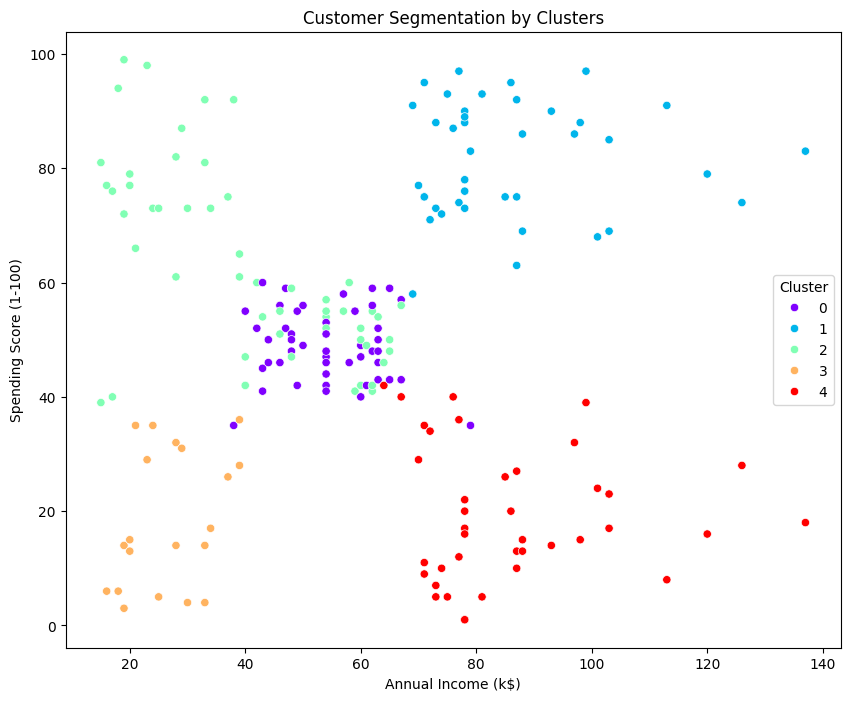

In [92]:

# 13. Visualization of the clusters
# Assuming you've performed clustering and have labeled the clusters as 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_data, palette='rainbow')
plt.title('Customer Segmentation by Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# 14. Repeat steps 11 to 13 using the three features ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# You can repeat steps 11 to 13 with the modified feature set
